In [56]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
%matplotlib inline

In [26]:
# load the config file because it has the path to the filelist
json_fn = 'ilsvrc.json'
config = json.load(open(json_fn))
print(json.dumps(config,indent=3))

{
   "data": {
      "handler": "ilsvrc_dataset",
      "batch_size": 128,
      "train_filelist": "/lus/theta-fs0/software/datascience/ImageNet/ILSVRC/ilsvrc_train_filelist.txt",
      "test_filelist": "/lus/theta-fs0/software/datascience/ImageNet/ILSVRC/ilsvrc_val_filelist.txt",
      "shuffle_buffer": 200000,
      "reshuffle_each_iteration": true,
      "num_parallel_readers": 8,
      "prefectch_buffer_size": 10,
      "crop_image_size": [
         256,
         256
      ],
      "num_classes": 1000,
      "num_channels": 3
   }
}


total image files:  1281167
plotting filename:  /lus/theta-fs0/software/datascience/ImageNet/ILSVRC/Data/CLS-LOC/train/n12620546/n12620546_23481.JPEG
data shape:  (332, 500, 3)


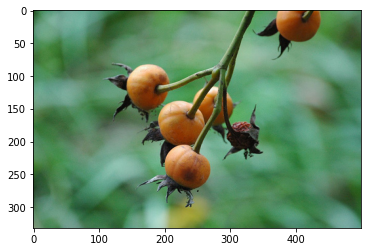

In [96]:
# open the file
filelist = config['data']['train_filelist']
file = open(filelist)
# read all the lines, there is one file path per line in the file
train_filelist = file.readlines()
print('total image files: ',len(train_filelist))
# choose one image to use as an example
image_index = 4000
image_filename = train_filelist[image_index].strip()
print('plotting filename: ',image_filename)
image = mpimg.imread(image_filename)
print('data shape: ',image.shape)
plt.imshow(image)


In [97]:
# convert JPEG filename to be the corresponding XML filename
xml_fn = image_filename.replace('Data','Annotations').replace('JPEG','xml')
# some images have no corresponding annotations XML file
if os.path.exists(xml_fn): 
    print('xml filename:',xml_fn,os.path.exists(xml_fn))
    for line in open(xml_fn):
        if len(xl) > 0:
            print(line.replace('\n',''))
else:
    print('no xml file found')
    xml_fn = None

xml filename: /lus/theta-fs0/software/datascience/ImageNet/ILSVRC/Annotations/CLS-LOC/train/n12620546/n12620546_23481.xml True
<annotation>
	<folder>n12620546</folder>
	<filename>n12620546_23481</filename>
	<source>
		<database>ILSVRC_2012</database>
	</source>
	<size>
		<width>500</width>
		<height>332</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>n12620546</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>155</xmin>
			<ymin>202</ymin>
			<xmax>272</xmax>
			<ymax>303</ymax>
		</bndbox>
	</object>
	<object>
		<name>n12620546</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>105</xmin>
			<ymin>79</ymin>
			<xmax>209</xmax>
			<ymax>174</ymax>
		</bndbox>
	</object>
	<object>
		<name>n12620546</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>334</xmin>
			<ymin>0</ymin>
			<xmax

[[202, 155, 303, 272], [79, 105, 174, 209], [0, 334, 79, 441], [137, 165, 239, 264], [115, 244, 205, 313]]


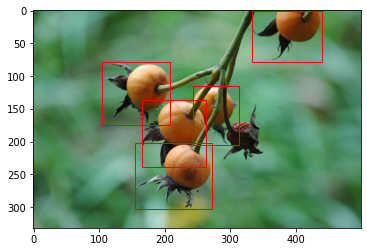

In [95]:
# read the XML file with Python's XML reader (XML is a bit antiquated)
tree = ET.parse(xml_fn)
root = tree.getroot()

img_size = root.find('size')
img_width = int(img_size.find('width').text)
img_height = int(img_size.find('height').text)
# img_depth = int(img_size.find('depth').text)

objs = root.findall('object')
bndbxs = []
# label = None
for object in objs:
    bndbox = object.find('bndbox')
    bndbxs.append([
    int(bndbox.find('ymin').text),
    int(bndbox.find('xmin').text),
    int(bndbox.find('ymax').text),
    int(bndbox.find('xmax').text)
    ])

print(bndbxs)

# Add the patch to the Axes
f,a = plt.subplots(1)
a.imshow(image)

for box in bndbxs:
    rect = patches.Rectangle((box[1], box[0]), box[3]-box[1], box[2] - box[0], linewidth=1, edgecolor='r', facecolor='none')
    a.add_patch(rect)